In [12]:
#Some libraries

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import time
%matplotlib inline

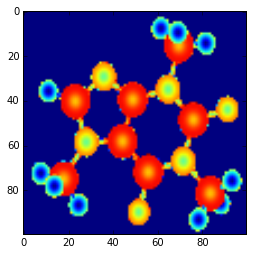

In [18]:
#Opening and plotting he image
im_src=Image.open('imagesample1.png')
im_src=Image.open('imagesample2.jpg')
im_src=im_src.resize((100,100))

image=np.array(im_src).mean(2)
image=255-image

fig=plt.figure(figsize=(4, 4)) # supoose I know what the limits are going to be
ax=fig.add_subplot('111')
ax.imshow(image)
plt.ion()
plt.show()

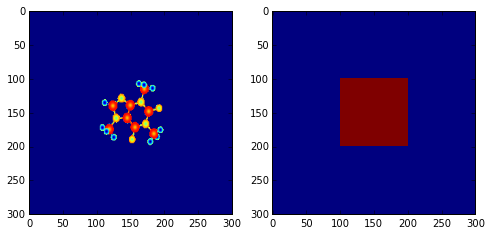

In [19]:
#Padding the image with zeros on the size. For this technique to work, the image needs to be over sampled in the spectral domain.
#This is equivalent to add padding in the spatial domain.
#It is also necesary to know th eboundaries where the image is contained

expansion=3
mask=np.zeros((image.shape[0]*expansion,image.shape[1]*expansion))

imagepadded=np.zeros((image.shape[0]*expansion,image.shape[1]*expansion))
imagepadded[image.shape[0]*(expansion-1)/2:image.shape[0]*(expansion+1)/2,image.shape[1]*(expansion-1)/2:image.shape[1]*(expansion+1)/2]=image

mask[image.shape[0]*(expansion-1)/2:image.shape[0]*(expansion+1)/2,image.shape[1]*(expansion-1)/2:image.shape[1]*(expansion+1)/2]=1

fig=plt.figure(figsize=(8, 4)) # supoose I know what the limits are going to be
ax=fig.add_subplot('121')
ax.imshow(imagepadded)
ax=fig.add_subplot('122')
ax.imshow(mask)
plt.ion()
plt.show()

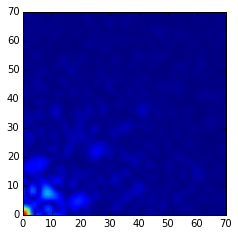

In [20]:
#We calculate the Fourier transform and remove the phase information, by taking the magnitude of the complex spectrum

fouriertransformabs=np.abs(np.fft.fft2(imagepadded))

fig=plt.figure(figsize=(8, 8)) # supoose I know what the limits are going to be
ax=fig.add_subplot('221')
ax.imshow(fouriertransformabs)
ax.set_xlim([0,70])
ax.set_ylim([0,70])
plt.ion()
plt.show()


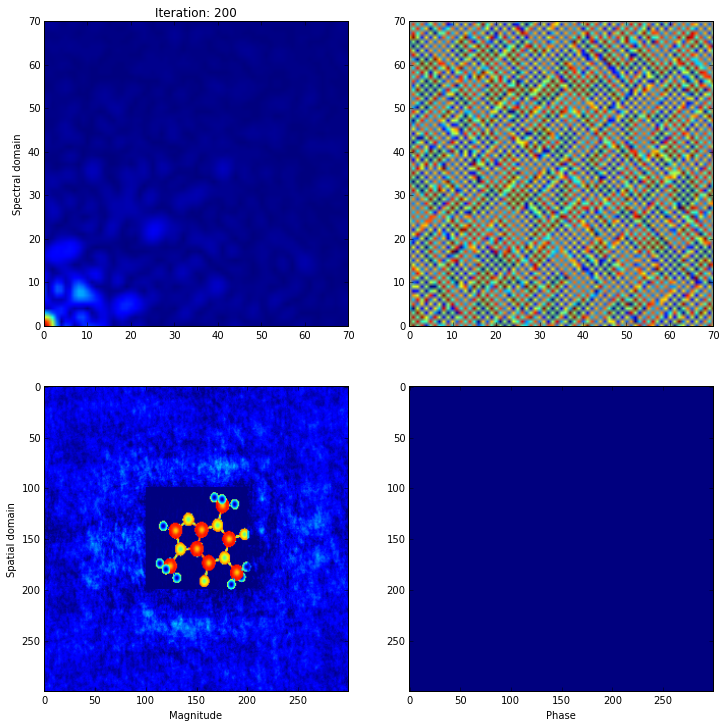

200


KeyboardInterrupt: 

In [29]:
#Now is when the fun starts. Knowing only the absolute part of the target spectrum, and the size of the object (mask), we iterate.
# The iterations essentially do the following:
# -2 Start with a random image in the spatial domain
# -3 Crop the image with the boundaries of the mask.
# -4 Apply the Fourier transform.
# -5 Keep the phases of the complex numbers, but replaced the magnitude by the target spectrum.
# -6 Apply the inverse Fourier transform.
# -7 Update the regions within the mask with the new val 

fig=plt.figure(figsize=(12, 12)) # supoose I know what the limits are going to be
ax1=fig.add_subplot('221')
ax1.set_ylabel('Spectral domain')
ax1.imshow(fouriertransformabs)
ax1.set_xlim([0,70])
ax1.set_ylim([0,70])

ax2=fig.add_subplot('222')
ax3=fig.add_subplot('223')
ax4=fig.add_subplot('224')

plt.ion()
plt.show()

spacedomain=mask.astype(np.float32)*np.random.rand(*(mask.shape))

i=0
while(2>1):    
        
    fouriertransform=np.fft.fft2(spacedomain)
    fouriertransformphase=np.angle(fouriertransform)
    fouriertransform=fouriertransformabs*np.exp(1j*fouriertransformphase)
            
    spacedomainaux=np.fft.ifft2(fouriertransform)   
    spacedomain=np.abs(spacedomainaux*mask+(1-mask)*(spacedomain-spacedomainaux*0.9))
    
    if i%50==0:
        ax2.cla()
        ax3.cla()
        ax4.cla()
        ax3.set_ylabel('Spatial domain')
        ax1.set_title('Iteration: %d'%i)
        ax3.set_xlabel('Magnitude')
        ax4.set_xlabel('Phase')
        ax2.imshow(fouriertransformphase)
        ax2.set_xlim([0,70])
        ax2.set_ylim([0,70])

        ax3.imshow(np.abs(spacedomain))
        ax4.imshow(np.angle(spacedomain))

        display.clear_output(wait=True)
        display.display(fig) 
        time.sleep(0.01)
        print i
    i+=1
    